In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
import warnings
warnings.simplefilter('ignore')

In [66]:
df = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [67]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [68]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [69]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [70]:
df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [71]:
df['Age'].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [72]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [73]:
df.shape

(891, 12)

In [74]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [75]:
null_values = df.isnull()
null_test = test.isnull()

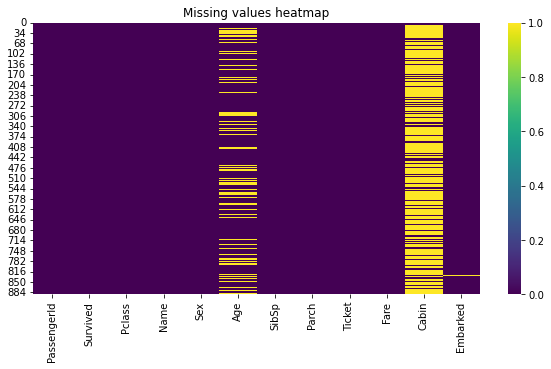

In [76]:
plt.figure(figsize = (10,5))
sns.heatmap(data = null_values, cmap = 'viridis').set_title("Missing values heatmap");

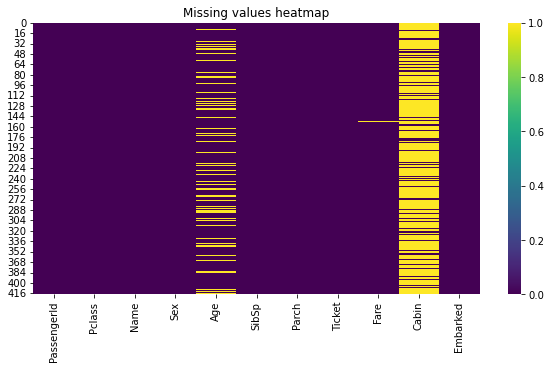

In [77]:
plt.figure(figsize = (10,5))
sns.heatmap(data = null_test, cmap = 'viridis').set_title("Missing values heatmap");

In [78]:
df.dropna(subset = 'Embarked', inplace = True)

In [79]:
test.dropna(subset = 'Embarked', inplace = True)

In [80]:
df['Age'].fillna(df['Age'].median(),inplace = True)
test['Age'].fillna(test['Age'].median(),inplace = True)
test['Fare'].fillna(test['Fare'].mean(),inplace = True)

In [81]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [82]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [83]:
df.corr()['Survived'].sort_values()

Pclass        -0.335549
Age           -0.069822
SibSp         -0.034040
PassengerId   -0.005028
Parch          0.083151
Fare           0.255290
Survived       1.000000
Name: Survived, dtype: float64

In [84]:
df.drop(['PassengerId','Name','Ticket','Cabin'], axis = 1, inplace = True)

In [85]:
PassengerId = test['PassengerId'] 

In [86]:
test.drop(['PassengerId','Name','Ticket','Cabin'], axis = 1, inplace = True)

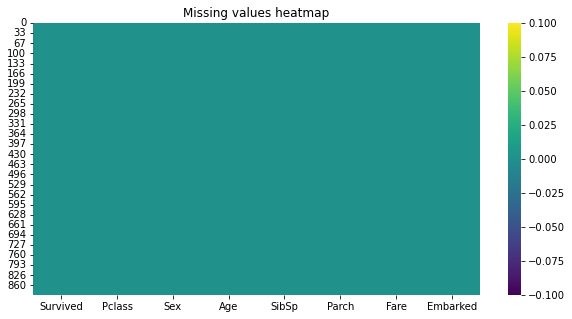

In [87]:
null_val = df.isnull()
plt.figure(figsize = (10,5))
sns.heatmap(data = null_val, cmap = 'viridis').set_title("Missing values heatmap");

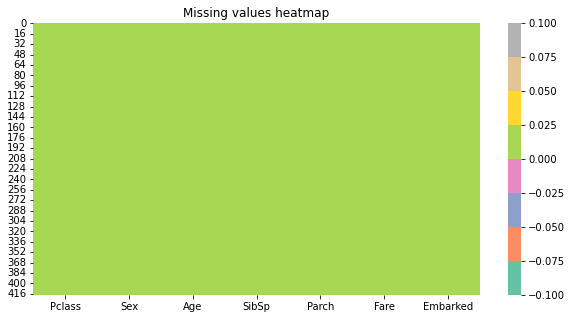

In [88]:
test_null_val = test.isnull()
plt.figure(figsize = (10,5))
sns.heatmap(data = test_null_val, cmap = 'Set2').set_title("Missing values heatmap");

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.5+ KB


In [90]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      418 non-null    float64
 6   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 23.0+ KB


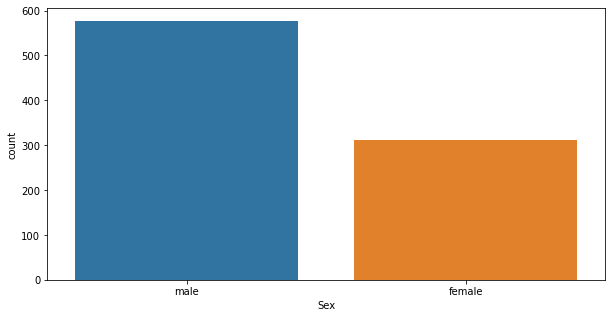

In [91]:
plt.figure(figsize = (10,5))
sns.countplot(data = df, x = 'Sex');

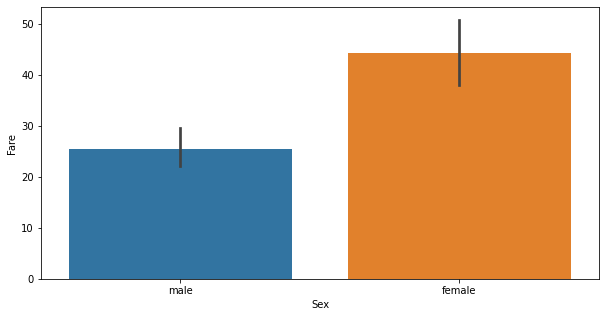

In [92]:
plt.figure(figsize = (10,5))
sns.barplot(data = df, x = 'Sex', y = 'Fare');

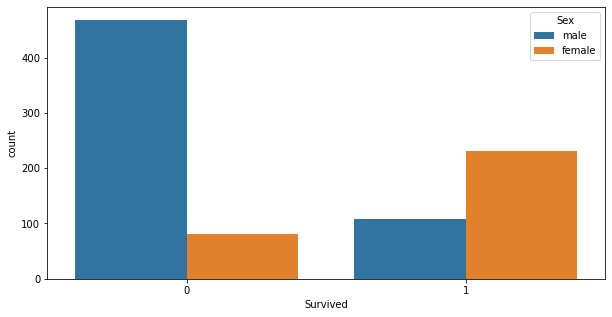

In [93]:
plt.figure(figsize = (10,5))
sns.countplot(data = df, x = 'Survived', hue = 'Sex');

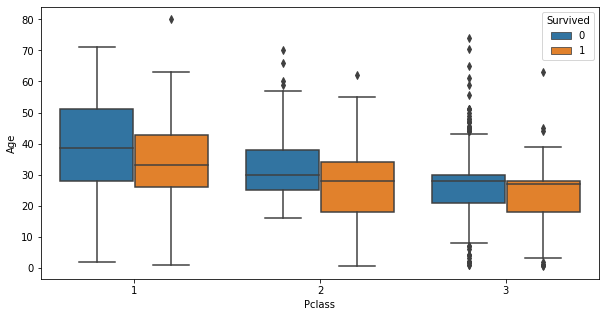

In [94]:
plt.figure(figsize = (10,5))
sns.boxplot(data = df, x = 'Pclass', y = 'Age', hue = 'Survived');

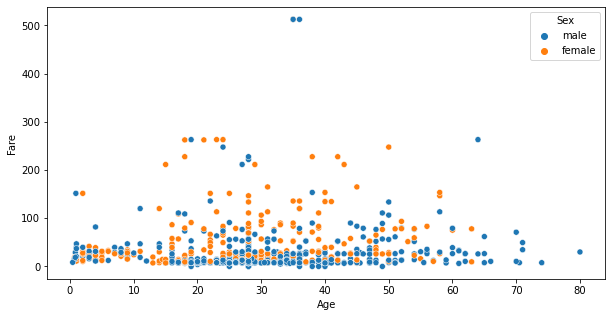

In [95]:
plt.figure(figsize = (10,5))
sns.scatterplot(data = df, x = 'Age', y = 'Fare', hue = 'Sex');

<Figure size 720x360 with 0 Axes>

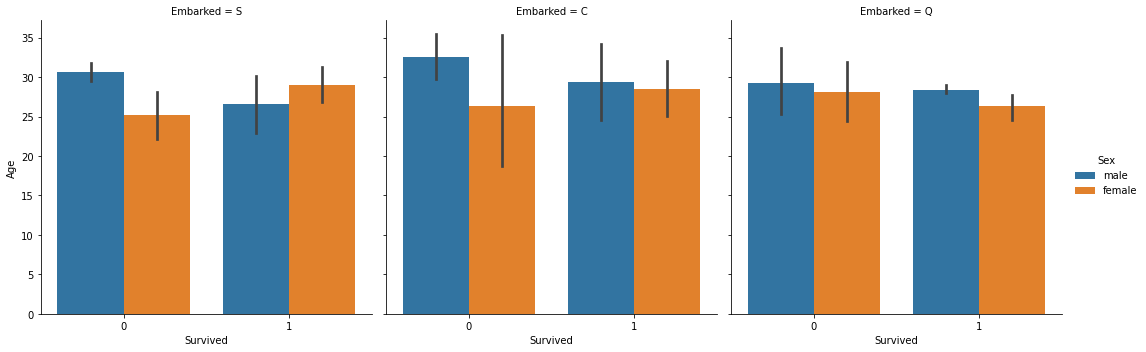

In [96]:
plt.figure(figsize = (10,5))
sns.catplot(data = df, x = 'Survived', y = 'Age', hue = 'Sex', col = 'Embarked', kind = 'bar');

In [97]:
test['Pclass'] = np.array(test['Pclass'], dtype = 'str')

In [98]:
df['Pclass'] = np.array(df['Pclass'], dtype = 'str')

In [99]:
obj = df.select_dtypes(include = 'object')
num = df.select_dtypes(exclude = 'object')

In [100]:
obj_test = test.select_dtypes(include = 'object')
num_test = test.select_dtypes(exclude = 'object')

In [101]:
obj_val = pd.get_dummies(obj, drop_first = True)

In [102]:
test_obj_val = pd.get_dummies(obj_test, drop_first = True)

In [103]:
train_titanic = pd.concat([obj_val, num], axis = 1)

In [104]:
test_titanic = pd.concat([test_obj_val, num_test], axis = 1)

In [105]:
#train_titanic.to_csv('train_titanic.csv')

In [106]:
#test_titanic.to_csv('test_titanic.csv')

In [107]:
X = train_titanic.drop('Survived', axis = 1)

In [108]:
y =train_titanic['Survived']

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state= 101)

In [110]:
scaler = StandardScaler()

In [111]:
model_log = LogisticRegression()

In [112]:
operations = [('scaler',scaler), ('model_log',model_log)]

In [113]:
pipe = Pipeline(operations)

In [114]:
param = {'model_log__C': list(np.arange(0,10,0.5))}

In [115]:
grid_model = GridSearchCV(pipe, param_grid = param)

In [116]:
grid_model.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model_log', LogisticRegression())]),
             param_grid={'model_log__C': [0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0,
                                          3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5,
                                          7.0, 7.5, 8.0, 8.5, 9.0, 9.5]})

In [117]:
grid_model.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('model_log', LogisticRegression(C=0.5))],
 'verbose': False,
 'scaler': StandardScaler(),
 'model_log': LogisticRegression(C=0.5),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'model_log__C': 0.5,
 'model_log__class_weight': None,
 'model_log__dual': False,
 'model_log__fit_intercept': True,
 'model_log__intercept_scaling': 1,
 'model_log__l1_ratio': None,
 'model_log__max_iter': 100,
 'model_log__multi_class': 'auto',
 'model_log__n_jobs': None,
 'model_log__penalty': 'l2',
 'model_log__random_state': None,
 'model_log__solver': 'lbfgs',
 'model_log__tol': 0.0001,
 'model_log__verbose': 0,
 'model_log__warm_start': False}

In [118]:
grid_pred = grid_model.predict(X_test)

In [119]:
print(classification_report(y_test, grid_pred))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88        57
           1       0.82      0.72      0.77        32

    accuracy                           0.84        89
   macro avg       0.84      0.82      0.82        89
weighted avg       0.84      0.84      0.84        89



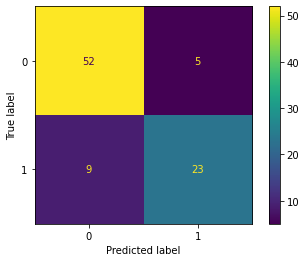

In [120]:
ConfusionMatrixDisplay.from_estimator(grid_model ,X_test, y_test)

In [121]:
log_model = LogisticRegression(C = 0.5)

In [122]:
operation = [('scaler',scaler), ('log_model',log_model)]

In [123]:
pipe_og = Pipeline(operation)

In [124]:
pipe_og.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('log_model', LogisticRegression(C=0.5))])

In [125]:
pipe_pred = pipe_og.predict(test_titanic)

In [126]:
pipe_pred = pipe_og.predict(test_titanic)

In [127]:
timflash_titanic = pd.DataFrame({'PassengerId': PassengerId, 'Survived': pipe_pred})

In [128]:
#timflash_titanic.to_csv('timflash_titanic.csv')